# Stroke Prediction

<br>

| No |       Student Name        | Student ID |       Program      |
| -- | ------------------- | ---------- | ------------------ |
| 1. | Lim Qing Ren | 0349233 | Bachelor of Computer Science |
| 2. | Chan Jia Qi | 0348476 | Bachelor of Computer Science |
| 3. | Khoo Tze Wei | 0348473 | Bachelor of Software Engineering |
| 4. | Gan Rong Sheng | 0350951 | Bachelor of Computer Science |
| 5. | Ng Yue Qian | 0349997 | Bachelor of Computer Science |

## Part 1: Defining the Problem and Questions

### 1.1 Problem Statement
<p style='text-align: justify;'> Every year, the number of stroke patients has been steadily increasing. Stoke is normally caused by high blood pressure of 130/80 or higher, diabetes, tobacco and heart disease such as blockage of blood vessels including atrial fibrillation and more. When an individual does not take any precautions on this, a stroke event could occur suddenly without warning. If a patient is affected by a stroke, it will negatively impact their daily life due to restricted physical abilities, speech impairment, and the paralysis of limbs. In the worst-case scenario, strokes can even lead to death. The recovery of a stroke patient can take up to weeks, months or even longer years, depending on the patient's health. As such, the rate of stroke patients should be reduced to make sure every living human could have a healthy life free of any diseases. With that, the aim of this study is to determine which machine learning algorithms are best to predict stroke events in the future, such that any relevant individuals that are at risk could make better and earlier preparations.  
<br>

### 1.2 Research Question
<p style='text-align: justify;'> As previously stated, the number of stroke patients is increasing, and early detection is one of the most effective ways of dealing with or treating stroke. It is common for hospitals to have basic health information as well as disease statutes or a patient's history. This allows hospitals to use existing patient data to predict who is more likely to have a stroke based on their health record. This raises a few research questions, which this paper seeks to address. 
Given an anonymized dataset that can be immediately extracted from a hospital. What data preprocessing steps should be taken to prepare data for a supervised classification model? What is the best way to represent the data numerically in order to achieve the best performance while remaining simple? Which classification model performs best in terms of AUC, accuracy, precision, recall, and f1 score?
<br>

### 1.3 Background & Motivation
<p style='text-align: justify;'>A stroke, also known as a brain attack, takes place when there is a blockage of blood supply to a part of the brain or when a blood vessel in the brain bursts. Stroke causes around 4.5 millions deaths per year all around the world, which is around 11% of total deaths. This then makes stroke the second leading cause of death globally, according to the World Health Organisation (WHO). 
<br>
    
<p style='text-align: justify;'> The objective of this report is to predict the outcome of stroke based on the data provided. The data consist of important attributes such as gender, age, health test related records (bmi, heart diseases, stroke, etc) to allow the prediction of patients who are most likely to get a stroke. Machine learning algorithms are then used to analyse and process the data given to obtain the results. There are many methods of processing and cleaning the data to ensure that the data is neat to produce a reliable and accurate result. The results can be displayed in forms of data visualisations.
<br>    

<p style='text-align: justify;'> Having the results being obtained, we then can conclude which factors or attributes that causes patients to most likely get a stroke. Therefore, this will allow everyone to be more cautious of their lifestyles.


#### Summary of Taxonomy Mapping

<p style='text-align: justify;'> From the above taxonomy mapping, there are 5 branches which are features, pre-processing, machine learning algorithms, data visualisation and the result of the research papers we had read. 
<br>
    
<p style='text-align: justify;'> In the first branch of the taxonomy mapping, are the variables of the datasets used by the researchers. The features are age, gender, hypertension, heart disease, ever married, work type, residence type, average glucose level, BMI, smoking status, stroke, diagnostic fee, treatment fee, medicine service fee, insurance fee, self-payment fee, total health-service fee, individual medicine fee, total medicine fee, total days of prescription, total amount of prescription and total fee of prescription. These features except for fees are the factors that arise to stroke.
    <br>

<p style='text-align: justify;'> Moving on is the pre-processing branch. Under this brach there are Gradient-boosting decision tree (GBDT), label encoding, missing value is where removing the columns or replacing the data that have missing values, imbalanced data, outlier elimination is where the data falls out of the limits, feature selection is where we select the important features out from the dataset, correlation coefficient analysis, principal component analysis and normalisation which converting the data into a different format.
    <br>

<p style='text-align: justify;'> In the third branch, there are many machine learning algorithms that were used in the research paper by the researchers such as Naive Bayes, Random Forest, Logistic Regression, K-Nearest Neighbor, Stochastics Gradient Descent, Decision Tree, Multilayer Perceptron, Majority Voting, Deep Neural Network (DNN), Linear Regression, Support Vector Machine, XGBoost, Classification and Regression Trees (CART), Adaptive Boost Machine, LASSO, Artificial Neural Network and Long Short-term Memory.
    <br>

<p style='text-align: justify;'> Next branch is about data visualisation used to present the data in the presented way. In those research papers, Histogram, Line Graphs, Flow Chart, Bar Chart, N-SRS Tree Based Graph, Box plot, Dot graph, Heatmap, Biplot and Scatterplot are used to visualise the data.
    <br>

<p style='text-align: justify;'> Lastly, are the results of each research paper. As a summary, every dataset has its own adaptation to a specific machine learning, where that specific machine learning will present a more accurate output than other machine learning. For example, Naives Bayes have the highest accuracy in one of the papers, but it doesn't apply to every dataset. 
<br>

### Loading libraries and reading csv file

In [1]:
#load libraries
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Preprocessing packages
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score

# ML model packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Before cleaning

### Checking categorical columns and numerical columns that expected to have a few unique value

In [5]:
data = data.drop('id', axis=1)

In [6]:
col1 = ['gender' , 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for column in data[col1]:
    print(column + ': ', data[column].unique())

gender:  ['Male' 'Female' 'Other']
hypertension:  [0 1]
heart_disease:  [1 0]
ever_married:  ['Yes' 'No']
work_type:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type:  ['Urban' 'Rural']
smoking_status:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [7]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

We can conclude that the 7 columns in the var col1 has expected value and no additional data cleaning needs to be done to it

### Identifying null and outliers values in the dataset

In [8]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
col2 = ['age', 'avg_glucose_level', 'bmi']
print('Minimum value')
for column in data[col2]:
    print(column, ': ', data[column].min())

print('--------------------------------------')
print('Max value')
for column in data[col2]:
    print(column, ': ', data[column].max())

Minimum value
age :  0.08
avg_glucose_level :  55.12
bmi :  10.3
--------------------------------------
Max value
age :  82.0
avg_glucose_level :  271.74
bmi :  97.6


In [10]:
data.loc[data['age'] == 0.08]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3295,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


<AxesSubplot:>

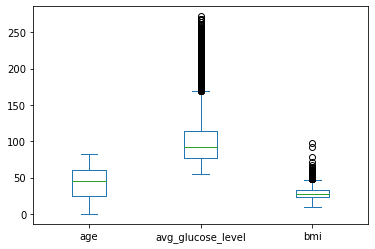

In [11]:
data[['age', 'avg_glucose_level', 'bmi']].plot.box()

Concluded that age column '0.08' is an acceptable value as it represents 29 days old baby that is possible of having diabetes. In addition box plot of the column did not list it as an outlier

The other 2 columns 'avg_glucose_level' & 'bmi' has many outliers as seen by their respective boxplots. However the outliers are necessary and will be kept within the dataset.

### Replacing null values with mode value

In [12]:
mode_df = data.mode()
data.fillna(mode_df.bmi[0], inplace=True)

In [13]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.7,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Normalizing both column with Min-Max

In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
data[['bmi', 'avg_glucose_level']] = scaler.fit_transform(data[['bmi', 'avg_glucose_level']])
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,0.801265,0.301260,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,0.679023,0.210767,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,0.234512,0.254296,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,0.536008,0.276060,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,0.549349,0.156930,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,0.132167,0.210767,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,0.323516,0.340206,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,0.128658,0.232532,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,0.513203,0.175258,formerly smoked,0


### Encoding data

In [16]:
enc = OrdinalEncoder()
data[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']] = enc.fit_transform(data[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])

In [17]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,2.0,1.0,0.801265,0.301260,1.0,1
1,0.0,61.0,0,0,1.0,3.0,0.0,0.679023,0.210767,2.0,1
2,1.0,80.0,0,1,1.0,2.0,0.0,0.234512,0.254296,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,0.536008,0.276060,3.0,1
4,0.0,79.0,1,0,1.0,3.0,0.0,0.549349,0.156930,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1,0,1.0,2.0,1.0,0.132167,0.210767,2.0,0
5106,0.0,81.0,0,0,1.0,3.0,1.0,0.323516,0.340206,2.0,0
5107,0.0,35.0,0,0,1.0,3.0,0.0,0.128658,0.232532,2.0,0
5108,1.0,51.0,0,0,1.0,2.0,0.0,0.513203,0.175258,1.0,0


### Correlation Analysis Heatmap

<AxesSubplot:>

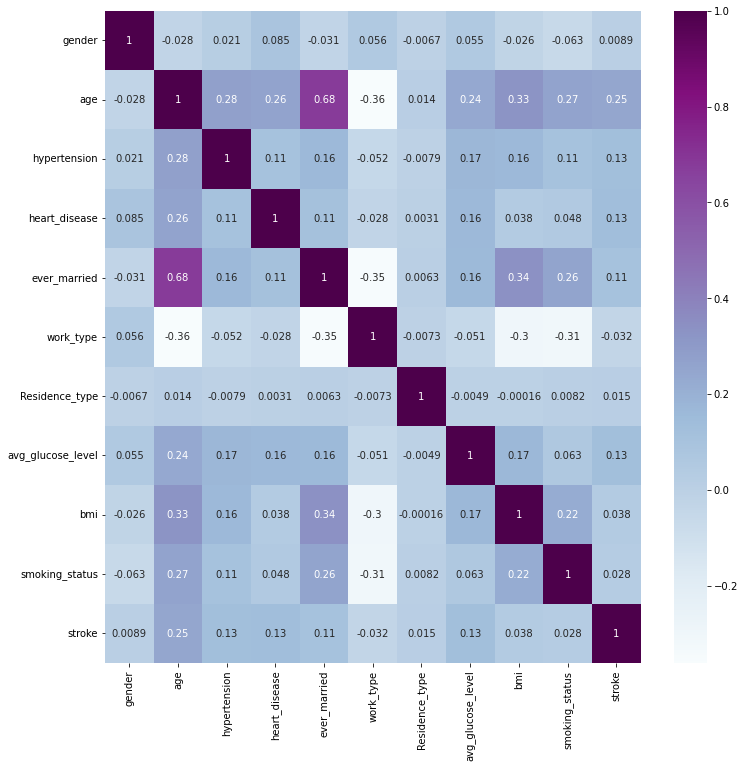

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap="BuPu")

## Part 3: Carrying out an Exploratory Data Analytics

In [19]:
print('Categorical Variables')
print('1. ID')
print('2. Gender              : Male / Female')
print('3. Heart_disease       : Does patient have heart disease (1 = Yes/2 = No)')
print('4. Hypertension        : Does patient have hypertension (1 = Yes/2 = No)')
print('5. Ever_married        : Marritial status of patient (Yes/ No)')
print('6. Work_type           : Children/ Govt_job/Never_worked/ Private/ Self-employed')
print('7. Residence_type      : Rural/ Urban')
print('8. Smoking_status      : Formerly smoked/ Never smoked/ smokes/ Unknown')
print('9. Stoke               : Does patient encounter stroke (1 = Yes/2 = No)')
print(' ')
print('Numerical Variables')
print('1. Age                 : Age')
print('2. Avg_glucose_level   : Average Glucose Level')
print('3. BMI                 : Body Mass Index')

Categorical Variables
1. ID
2. Gender              : Male / Female
3. Heart_disease       : Does patient have heart disease (1 = Yes/2 = No)
4. Hypertension        : Does patient have hypertension (1 = Yes/2 = No)
5. Ever_married        : Marritial status of patient (Yes/ No)
6. Work_type           : Children/ Govt_job/Never_worked/ Private/ Self-employed
7. Residence_type      : Rural/ Urban
8. Smoking_status      : Formerly smoked/ Never smoked/ smokes/ Unknown
9. Stoke               : Does patient encounter stroke (1 = Yes/2 = No)
 
Numerical Variables
1. Age                 : Age
2. Avg_glucose_level   : Average Glucose Level
3. BMI                 : Body Mass Index


In [20]:
cat_var = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
num_var = ['age', 'avg_glucose_level', 'bmi']

In [21]:
data[num_var].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,0.235563,0.212894
std,22.612647,0.209046,0.088180
min,0.080000,0.000000,0.000000
25%,25.000000,0.102137,0.154639
50%,45.000000,0.169721,0.207331
75%,61.000000,0.272228,0.257732
max,82.000000,1.000000,1.000000


<p style='text-align: justify;'> The above table hows the statistical result of the numerical variables of the dataset. The count is used to count the total row of non null value in that column, in this numerical dataset, only bmi consist of null values. Other than that, it shows the measure of central tendency and measure of dispersion of the variables which are mean, standard deviation (std), minimum value (min), 1st quartile (25%), median (50%), 3rd quartile (75%) and maximum value (max).  
<br>

### Data Visualisation

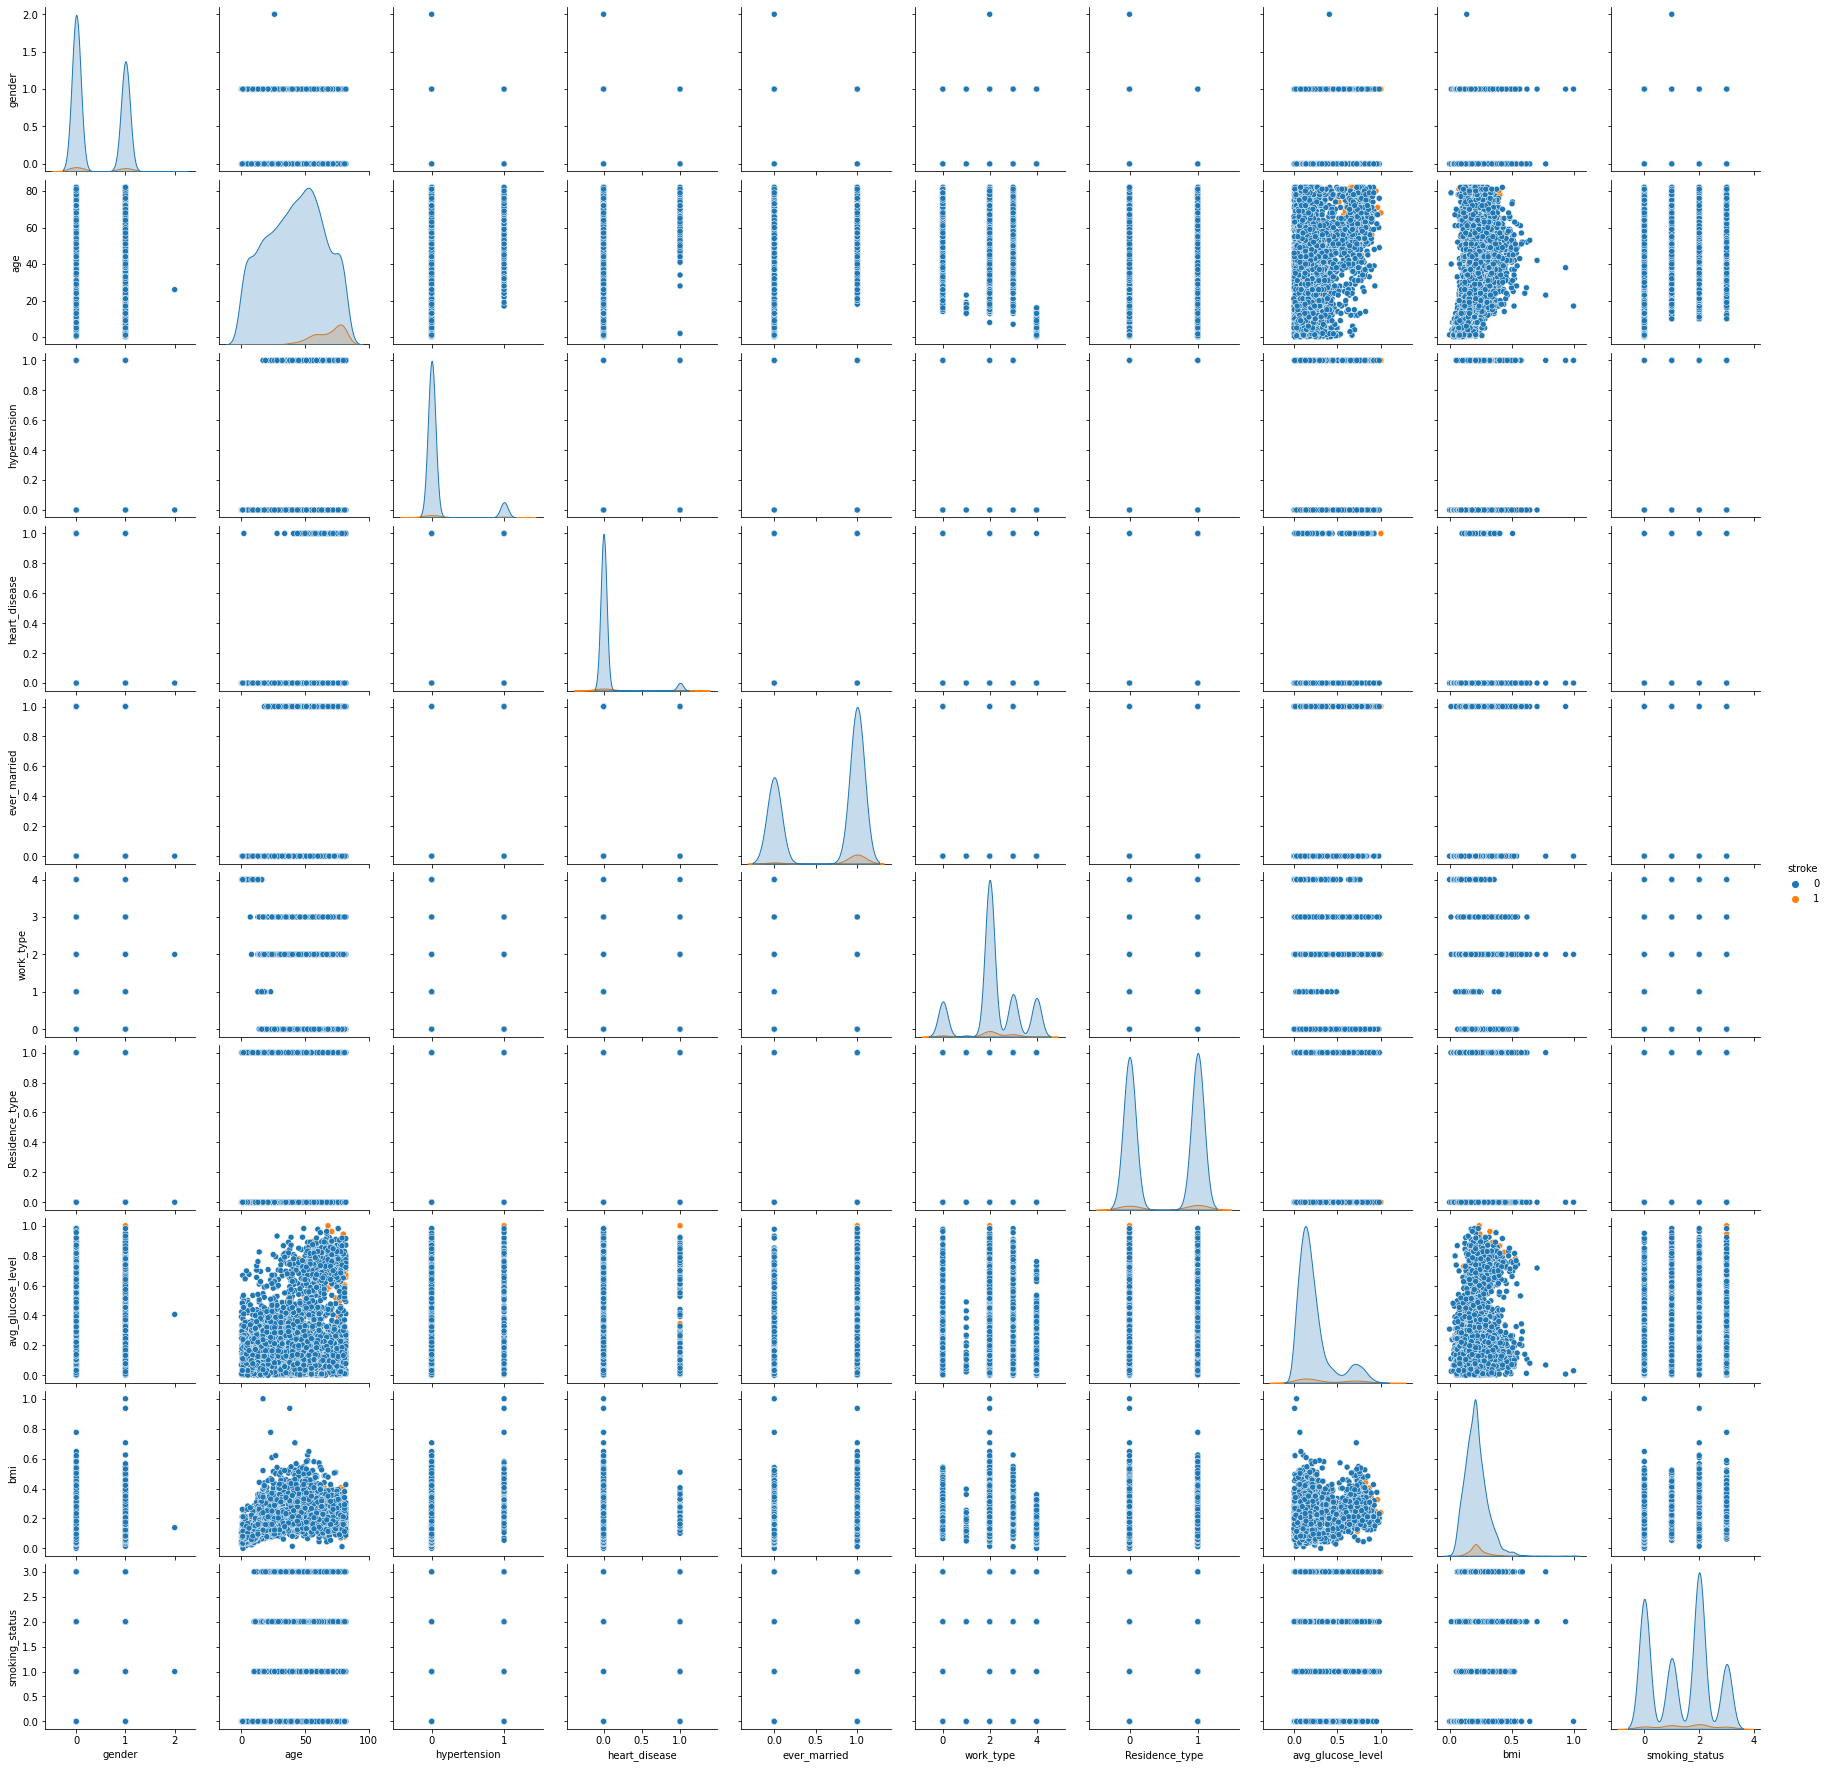

In [22]:
# Visualizing relationship between variables 
sns.pairplot(data=data, hue='stroke')

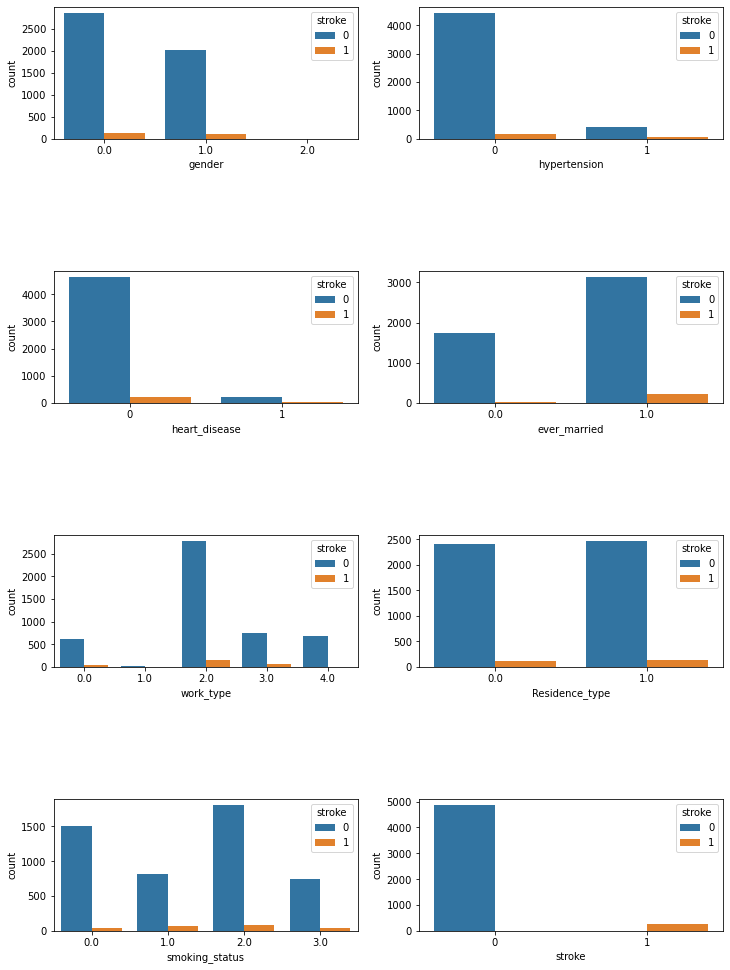

In [23]:
#Visualising the Categorical Variables 
fig,axes = plt.subplots(4,2,figsize=(12,17))
for idx,cat_col in enumerate(cat_var):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=data,hue='stroke',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

<p style='text-align: justify;'> The above bar charts are the visualisations for each categorical variables. In the bar chart, we can clearly see that we have more female patients than male. Also, most of the patient does not have hypertension and heart disease. More than half of the patients are married and most patients does not want to disclose their work type. Lastly, the residence type of the patients are almost the same for both urban and rural and most of them does not not smoke at all but there are unknown too. 
<br>

In [24]:
data_num = data
data_num[['age']] = scaler.fit_transform(data[['age']])

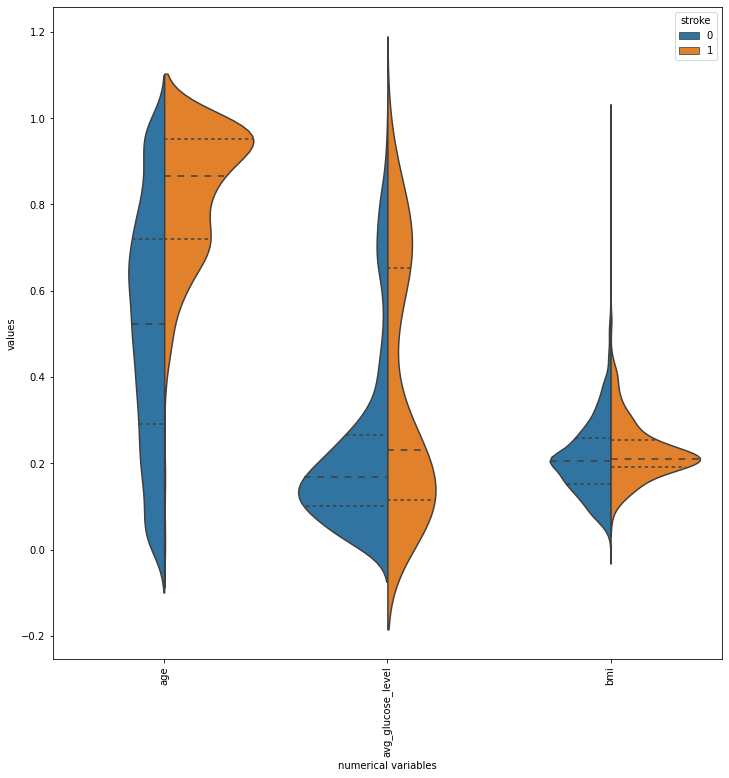

In [25]:
data_num = pd.concat([data[num_var],data.stroke],axis=1)
data_num = pd.melt(data_num,id_vars="stroke", var_name="numerical variables", value_name='values')

plt.figure(figsize=(12,12))
sns.violinplot(x="numerical variables", y="values", hue="stroke", data=data_num,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

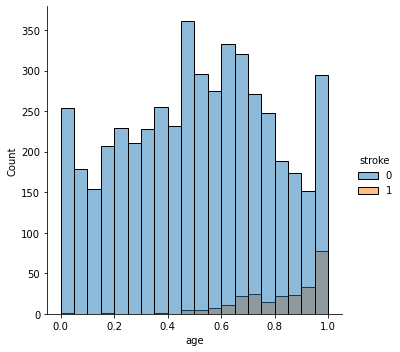

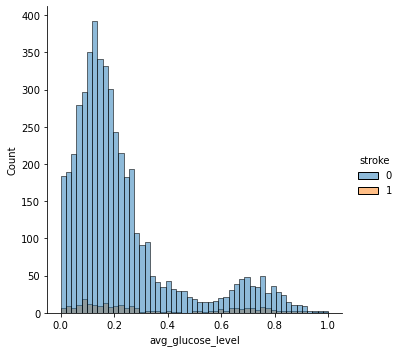

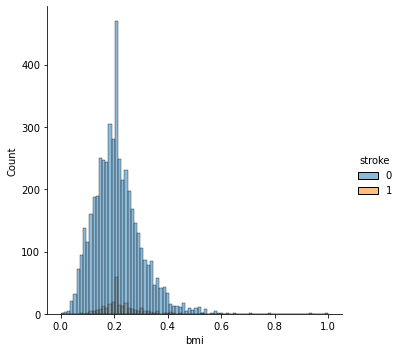

In [26]:
num_var = ['age', 'avg_glucose_level', 'bmi']
for x in num_var:
    sns.displot(x=x,data=data,hue='stroke')

plt.subplots_adjust(hspace=1)

## Part 4: Developing Your Data Science Model using Machine Learning

### Separating target variable & independent variable

In [27]:
X = data.drop('stroke', axis = 1)
Y = data.stroke

### Random Undersampling data

In [28]:
rus = RandomUnderSampler(random_state=5)
X_resampled, Y_resampled = rus.fit_resample(X, Y)
print(sorted(Counter(Y_resampled).items()))

[(0, 249), (1, 249)]


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state = 1)

### Decision tree model

In [30]:
param_DT = [{
    'criterion' : ('gini', 'entropy', 'log_loss'),
    'splitter' : ('best', 'random'),
    'max_depth' : [1, 2, 3, 4, 5]
    
}]

gs_DT = GridSearchCV(DecisionTreeClassifier(random_state = 42), 
                          param_DT, cv=5, scoring="accuracy")
gs_DT.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ('gini', 'entropy', 'log_loss'),
                          'max_depth': [1, 2, 3, 4, 5],
                          'splitter': ('best', 'random')}],
             scoring='accuracy')

In [31]:
print(gs_DT.best_estimator_)
DT = gs_DT.best_estimator_

DecisionTreeClassifier(max_depth=1, random_state=42)


In [32]:
print(gs_DT.best_score_)

0.7355693581780539


In [33]:
print(classification_report(Y_test,gs_DT.predict(X_test)))
Y_pred = gs_DT.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.53      0.64        68
           1       0.70      0.90      0.79        82

    accuracy                           0.73       150
   macro avg       0.76      0.72      0.72       150
weighted avg       0.75      0.73      0.72       150



### Logistics Regression

In [34]:
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [35]:
predictions = logmodel.predict(X_test)

In [36]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        68
           1       0.76      0.76      0.76        82

    accuracy                           0.73       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.73      0.73      0.73       150



### Hyperparameter Tuning Logistic Regression

In [37]:
param_LR = [{
    'penalty' : ["l2", "none"],
    'C': [0.001, 0.01, 0.1, 1.0],
    'multi_class': ["auto", "ovr", "multinomial"]
}]

gs_LR = GridSearchCV(LogisticRegression(), param_LR,
cv=5, scoring="accuracy",
verbose = 1, n_jobs=-1)
gs_LR.fit(X_train, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1.0],
                          'multi_class': ['auto', 'ovr', 'multinomial'],
                          'penalty': ['l2', 'none']}],
             scoring='accuracy', verbose=1)

In [38]:
print(gs_LR.best_estimator_)
LR = gs_LR.best_estimator_

LogisticRegression(multi_class='multinomial')


In [39]:
print(gs_LR.best_score_)

0.724223602484472


In [40]:
print(classification_report(Y_test,gs_LR.predict(X_test)))
l_regression_pred = gs_LR.predict(X_test)

              precision    recall  f1-score   support

           0       0.71      0.69      0.70        68
           1       0.75      0.77      0.76        82

    accuracy                           0.73       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.73      0.73      0.73       150



### K Nearest Neighbour 

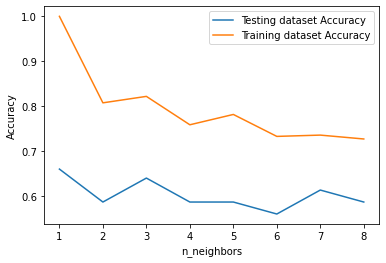

In [41]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)
  
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [42]:
knn_acc_table = pd.DataFrame({'N_Neighbors' : neighbors,
                          'Accuracy' : test_accuracy},
                         columns=['N_Neighbors','Accuracy'])

knn_acc_table[knn_acc_table['Accuracy']==knn_acc_table['Accuracy'].max()]

,N_Neighbors,Accuracy
0,1,0.66


In [43]:
#create a Kneighbors classifier
K_nearest = KNeighborsClassifier(n_neighbors = 4)

#train model using train dataset that we have created before this
K_nearest.fit(X_train, Y_train)

#predict the output for test dataset
K_nearest_pred = K_nearest.predict(X_test)

In [44]:
print('The K-Nearest Neighbors model has an Accuracy of : {}'.format(accuracy_score(Y_test, K_nearest_pred)))
print('The K-Nearest Neighbors model has an Precision of : {}'.format(precision_score(Y_test, K_nearest_pred)))
print('The K-Nearest Neighbors model has an Recall score of : {}'.format(recall_score(Y_test, K_nearest_pred)))
print('The K-Nearest Neighbors model has F1 score of : {}'.format(f1_score(Y_test, K_nearest_pred)))

The K-Nearest Neighbors model has an Accuracy of : 0.5866666666666667
The K-Nearest Neighbors model has an Precision of : 0.7380952380952381
The K-Nearest Neighbors model has an Recall score of : 0.3780487804878049
The K-Nearest Neighbors model has F1 score of : 0.5000000000000001


In [45]:
print(classification_report(Y_test,K_nearest_pred))

              precision    recall  f1-score   support

           0       0.53      0.84      0.65        68
           1       0.74      0.38      0.50        82

    accuracy                           0.59       150
   macro avg       0.63      0.61      0.57       150
weighted avg       0.64      0.59      0.57       150



### Naive Bayes

In [46]:
param_MNB = [{'alpha': [1, 1e-1, 1e-2, 0]}]

gs_MNB = GridSearchCV(MultinomialNB(), 
                          param_MNB, cv=5, scoring="accuracy")
gs_MNB.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid=[{'alpha': [1, 0.1, 0.01, 0]}], scoring='accuracy')

In [47]:
print(gs_MNB.best_estimator_)
MNB = gs_MNB.best_estimator_

MultinomialNB(alpha=1)


In [48]:
print(classification_report(Y_test,gs_MNB.predict(X_test)))
MNB_pred = gs_MNB.predict(X_test)

              precision    recall  f1-score   support

           0       0.51      0.74      0.60        68
           1       0.65      0.41      0.51        82

    accuracy                           0.56       150
   macro avg       0.58      0.57      0.55       150
weighted avg       0.59      0.56      0.55       150



### Random Forest

In [49]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)

RandomForestClassifier()

In [50]:
RFC_pred = RFC.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, RFC_pred))
print(classification_report(Y_test, RFC_pred))

Accuracy:  0.7066666666666667
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        68
           1       0.73      0.73      0.73        82

    accuracy                           0.71       150
   macro avg       0.70      0.70      0.70       150
weighted avg       0.71      0.71      0.71       150



### Random Forest Hyperparameter Tuning

In [51]:
random_param_RFC = {
'n_estimators': [50, 100, 150, 200, 250],
'criterion': ['gini', 'entropy', 'log_loss'], 
'max_depth': [2, 4, 6, 8, 10],
'max_features': ['log2', 'sqrt'],
}

In [52]:
random_param_RFC

{'n_estimators': [50, 100, 150, 200, 250],
 'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': [2, 4, 6, 8, 10],
 'max_features': ['log2', 'sqrt']}

In [53]:
RFC_random = RandomizedSearchCV(RFC, random_param_RFC, n_iter = 50, scoring="accuracy", cv = 5, verbose=1, random_state=1, n_jobs = -1)
RFC_random.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['log2', 'sqrt'],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]},
                   random_state=1, scoring='accuracy', verbose=1)

In [54]:
print('Best score: ', RFC_random.best_score_)
print('Best parameters: ', RFC_random.best_params_)

Best score:  0.7558592132505175
Best parameters:  {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'gini'}


In [55]:
param_RFC = {
'n_estimators': [180, 190, 200, 210, 220],
'criterion': ['entropy'], 
'max_depth': [9, 10, 11],
'max_features': ['sqrt'],
}

In [56]:
param_RFC

{'n_estimators': [180, 190, 200, 210, 220],
 'criterion': ['entropy'],
 'max_depth': [9, 10, 11],
 'max_features': ['sqrt']}

In [57]:
gs_RFC = GridSearchCV(RFC, param_RFC, scoring="accuracy", cv = 5, verbose=1, n_jobs = -1)
gs_RFC.fit(X_train, Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [9, 10, 11],
                         'max_features': ['sqrt'],
                         'n_estimators': [180, 190, 200, 210, 220]},
             scoring='accuracy', verbose=1)

In [58]:
print('Best score: ', gs_RFC.best_score_)
print('Best parameters: ', gs_RFC.best_params_)

Best score:  0.7586749482401656
Best parameters:  {'criterion': 'entropy', 'max_depth': 11, 'max_features': 'sqrt', 'n_estimators': 210}


In [59]:
gs_RFC_pred = gs_RFC.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, gs_RFC_pred))
print(classification_report(Y_test, gs_RFC_pred))

Accuracy:  0.7133333333333334
              precision    recall  f1-score   support

           0       0.68      0.69      0.69        68
           1       0.74      0.73      0.74        82

    accuracy                           0.71       150
   macro avg       0.71      0.71      0.71       150
weighted avg       0.71      0.71      0.71       150



In [60]:
RFC_new = RandomForestClassifier(
n_estimators = 750, 
max_depth = 105, 
max_features = 'sqrt', 
min_samples_leaf = 2,
min_samples_split = 10, 
bootstrap = True 
)
RFC_new.fit(X_train, Y_train)

RandomForestClassifier(max_depth=105, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=750)

In [61]:
gs_RFC_pred = RFC_new.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, gs_RFC_pred))
print(classification_report(Y_test, gs_RFC_pred))

Accuracy:  0.7066666666666667
              precision    recall  f1-score   support

           0       0.68      0.66      0.67        68
           1       0.73      0.74      0.73        82

    accuracy                           0.71       150
   macro avg       0.70      0.70      0.70       150
weighted avg       0.71      0.71      0.71       150



### Result

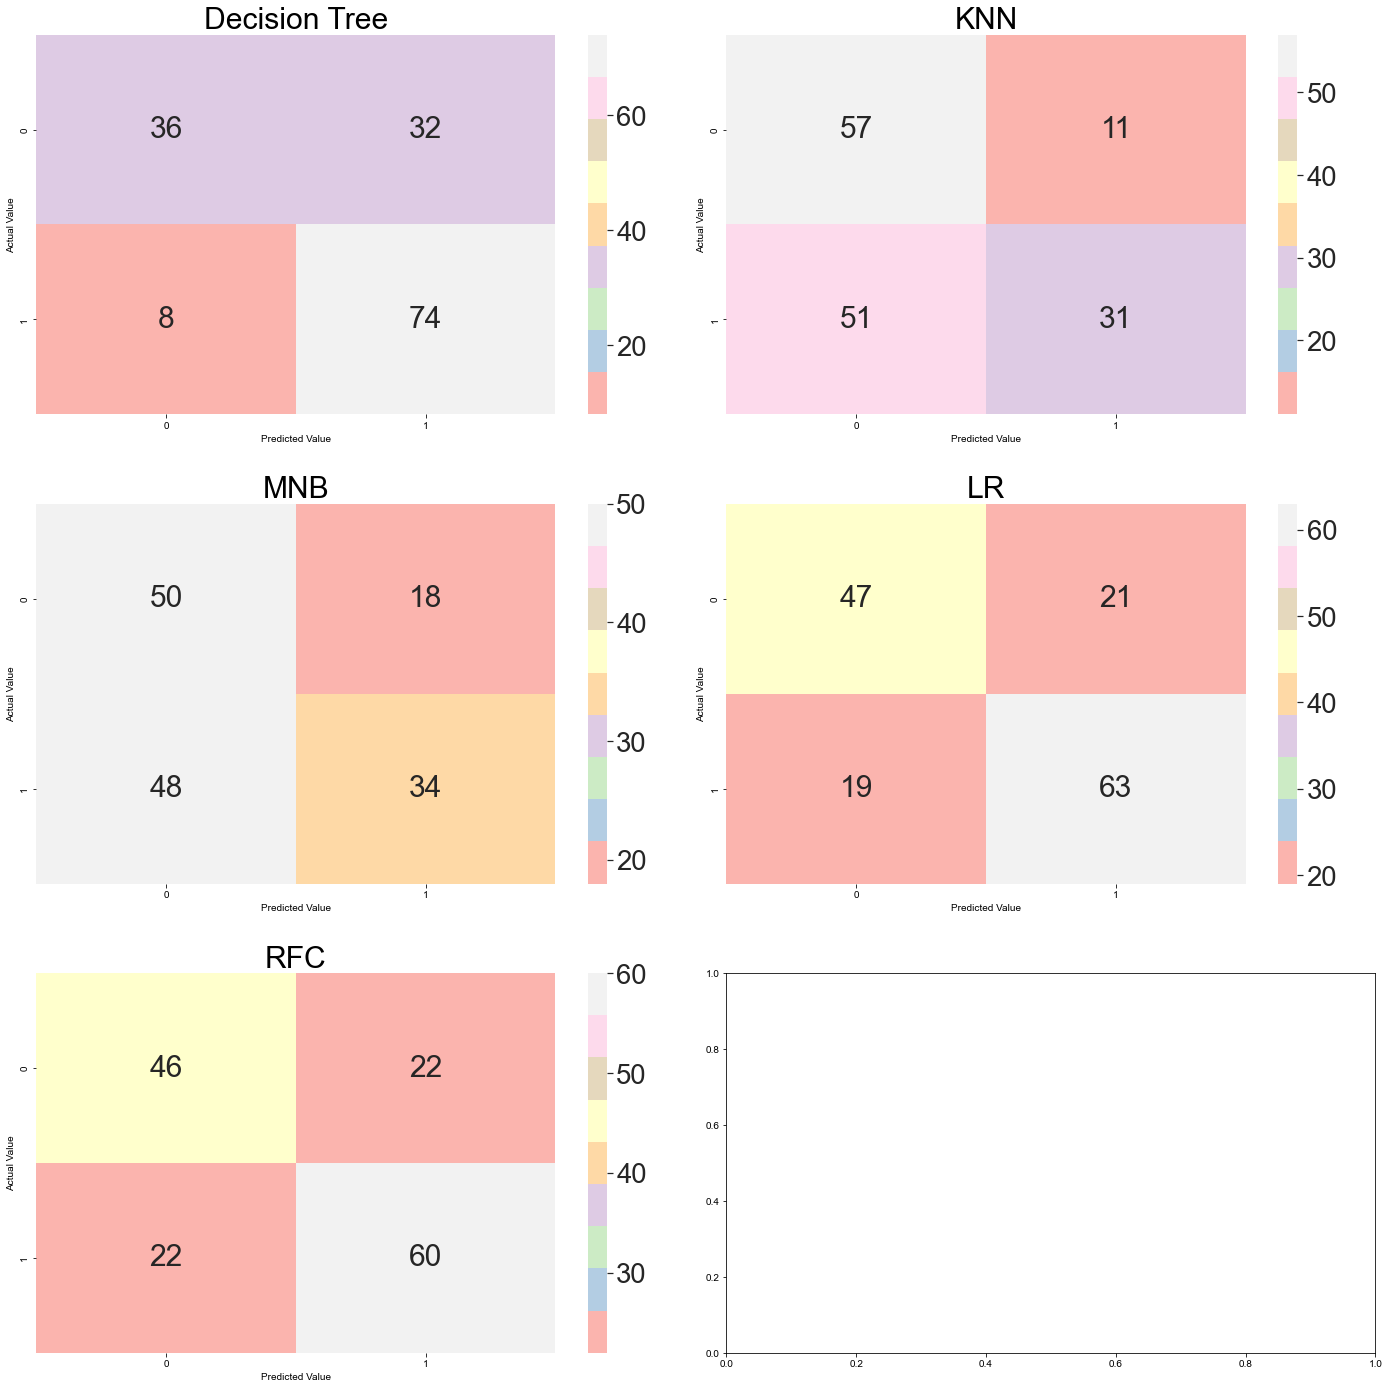

In [62]:
tree_conmat = confusion_matrix(Y_test, Y_pred)
lr_conmat = confusion_matrix(Y_test, l_regression_pred)
knn_conmat = confusion_matrix(Y_test, K_nearest_pred)
mnb_conmat = confusion_matrix(Y_test, MNB_pred)
rfc_conmat = confusion_matrix(Y_test, RFC_pred)

fig, axes = plt.subplots(3, 2,figsize=(20,20))
con_mat = [tree_conmat,knn_conmat, mnb_conmat, lr_conmat, rfc_conmat]
models = ['Decision Tree', 'KNN', 'MNB', 'LR', 'RFC']
i = 1
for conmat, ax, model in zip(con_mat, axes.flatten(), models):
    sns.set(font_scale=2.5)
    ax.set_title(model)
    sns.heatmap(conmat, ax=ax, annot = True, cmap = "Pastel1")
    ax.set_ylabel('Actual Value')
    ax.set_xlabel('Predicted Value')
    
plt.tight_layout()

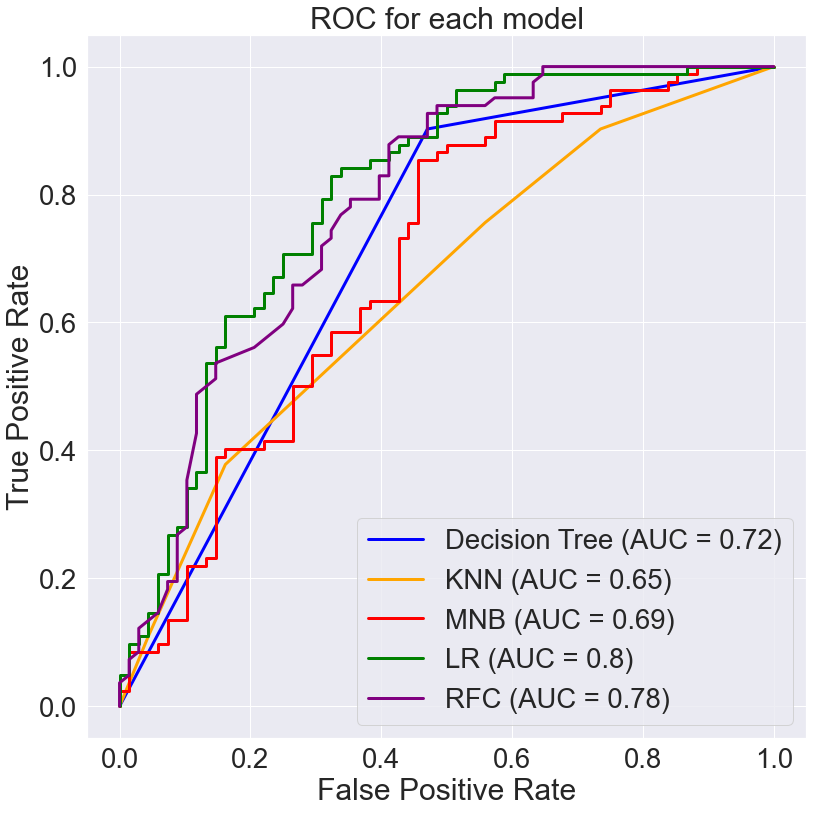

In [63]:
class_model = [DT,K_nearest, MNB, LR, RFC]
colors = ['blue', 'orange', 'red', 'green', 'purple']

plt.figure(figsize=(12,12))
for cm, m, c in zip(class_model, models,colors):
    y_score = cm.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.title('ROC for each model')
    plt.plot(fpr, tpr,color=c,label = '{} (AUC = {})'.format(m, round(roc_auc,2)),linewidth=3)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    
plt.tight_layout()